<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/tp1/tps/trabajo_practico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1: Análisis exploratorio de datos

**Objetivos:** Este trabajo tiene como objetivos que el alumno se familiarize con las funciones y librerías básicas de Python, pueda escribir pedazos de código sencillo, y pueda realizar operaciones básicas de manejo, limpieza y visualización de datos. También servirá como punto de inicio para ir pensando el trabajo final que encarará cada alumno.

**Librerías:** para realizar este trabajo serán necesarias las siguientes librerías (Si requiere usar otras no incluidas aquí, no dude en importarlas)
- Numpy: matemática básica y definición de matrices y vectores
- Scipy.stats: repositorio de distribuciones de probabilidad y funciones de algebra
- Pandas: manejo de datasets
- Seaborn: visualización de datos

In [49]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1: El tablero de Galton

El [tablero de Galton](https://en.wikipedia.org/wiki/Galton_board) (o quincunx) es un artefacto para demostrar físicamente el [Teorema Central del límite](https://en.wikipedia.org/wiki/Central_limit_theorem), que establece que la suma de muchas variables aleatorias independientes e idénticamente distribuidas tienden a una distribución Normal.

![Alt Text](https://media.giphy.com/media/ySmSyTWaZPLVY4r3GA/giphy.gif)

En el tablero, las bolitas van cayendo a través de una grilla de obstáculos equiespaciados. En cada sucesiva fila, la bolita que cae golpea en un obstáculo y sigue su recorrido a la izquierda o la derecha de este con igual probabilidad.

Asumiendo que la bolita arranca desde la posición horizontal central del tablero $x_0=0$, y va cayendo dando saltos discretos cada vez que se encuentra con un obstáculo, podemos calcular la posición horizontal de la bolita en el escalón $i$ según,
$$ 
x_{i+1} = x_{i} + \Delta_i,\ i=0,1,\ldots \\
\Delta =
\begin{cases}
1 & \text{con probabilidad 0.5}\\
-1 & \text{con probabilidad 0.5}
\end{cases}
$$

Se requiere crear una función para calcular la posición de la bolita desde su posición inicial, a través de N obstáculos (pasos) hacia abajo.

La función que figura abajo recibe tres argumentos: 
- p [0<float<1]: La probabilidad de la bolita de ir hacia la derecha (en nuestro tablero es 0.5)
- Npasos [int]: La cantidad de pasos que va a tener la caída (el tamaño del tablero)
- xinicial [int]: La posición inicial (preinicializada en 0)

Complete la función donde se indica, para calcular la posición para cada paso $x_i$ según la fórmula de más arriba.

In [50]:
def caminante( p, Npasos, xinicial=0 ):
    # Inicializar un vector de 0s por cada paso de la bolita hacia abajo
    x = np.zeros( Npasos ) 
    # Posición inicial
    x[0] = xinicial
    # Calcular la posición para cada paso
    for i in range( Npasos-1 ):
        # CÓDIGO DEL ALUMNO =============================
        u = np.random.random()
        x[i+1] = x[i] + ( u < p ) - ( u > p )
        # ===============================================
    return x

Realice un gráfico de 3 o 4 trayectorias de bolitas, con Npasos=30 para confirmar el correcto funcionamiento de la función 'caminante':

Text(0, 0.5, 'posicion')

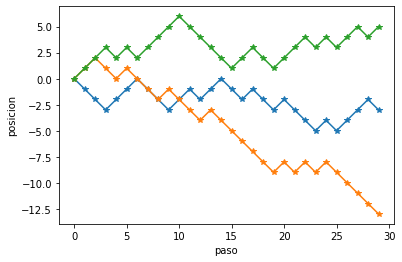

In [51]:
p = 0.5 # Probabilidad de ir a derecha
Npasos = 30 # Número de pasos de la trayectoria

# CÓDIGO DEL ALUMNO ========================
# Gráfico
fig = plt.figure()
for i in range( 3 ):
  plt.plot( caminante( p, Npasos ), marker='*' )
plt.xlabel('paso')
plt.ylabel('posicion')
# ==========================================

Luego de $N$ pasos, la posición de la bolita es el resultado de la suma de $N$ saltos $\Delta$. Luego de una buena cantidad de pasos, el TCL indica que la posición incierta de la bolita, sigue una distribución de probabilidad Normal según,
$$
x_i \sim N \left( 0, N/\sqrt{N} \right)
$$


para un número grande de trayectorias de bolitas, grafique el histograma de las posiciones de las bolitas luego de $N=30$, y compare con la distribución Normal según el TCL.

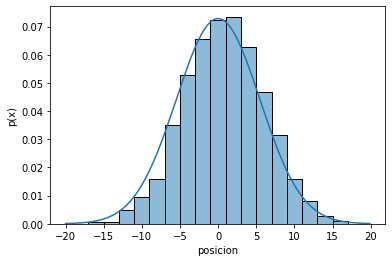

In [52]:
Nbolas = 2000 # Número de trayectorias a graficar
x = np.zeros( [Nbolas, Npasos]) # Posición de la bola i, en el paso j

# CÓDIGO DEL ALUMNO ==========================================
for i in range( Nbolas ):
    x[i] = caminante( 0.5, Npasos )

# Plot histogram
fig = plt.figure()
xplot = np.arange(-20,20,0.1)
s = np.sqrt(p*(1-p))
plt.plot( xplot, st.norm.pdf(xplot,0,Npasos/np.sqrt(Npasos)) );
sns.histplot( x[:,-1], fill=True, alpha=0.5, stat='density',
              bins='sturges', binwidth=2 )
plt.xlabel('posicion')
plt.ylabel('p(x)');
# ============================================================

## Ejercicio 2: Procesamiento de señales
En Enero de 2020  se midieron las vibraciones en un hospital situado sobre una línea de subterráneo en Buenos Aires. La medición original es de casi 1 hr de duración. En este TP trabajaremos con una ventana reducida de tiempo (100 s). A continuación, usted hará alguno de los pasos previos de selección de eventos y evaluaciones preliminares del nivel de ruido.

En primer lugar, importe el arhivo "vibraciones_hospital.csv". Es una tabla con 2 columnas, siendo estas el vector tiempo $t$ en segundos y las aceleraciones $a(t)$ en $m/s^{2}$.


In [53]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving vibraciones_hospital.csv to vibraciones_hospital (1).csv


In [54]:
import io

#Se crea un DataFrame
df_vibraciones = pd.read_csv(io.BytesIO(uploaded['vibraciones_hospital.csv']))

df_vibraciones.head()

,t [s],a(t) [m/s^2]
0,0.000000,0.001912
1,0.004202,0.014047
2,0.008403,0.008226
3,0.012605,-0.008920
4,0.016807,-0.015808


In [55]:
# Veremos el tamaño de la data y el nombre de la columnas
print('Cantidad de Filas y columnas:', df_vibraciones.shape)
print('Nombre columnas:', df_vibraciones.columns)

Cantidad de Filas y columnas: (23801, 2)
Nombre columnas: Index(['t [s]', 'a(t) [m/s^2]'], dtype='object')


[Text(0.5, 1.0, 'Registro de vibraciones')]

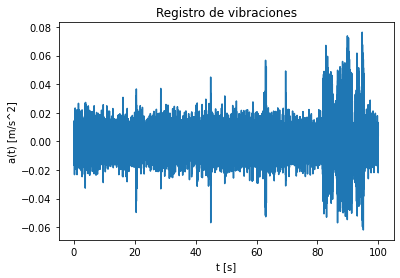

In [56]:
# Registro de aceleraciones
sns.lineplot(data=df_vibraciones, x='t [s]', y='a(t) [m/s^2]').set(title='Registro de vibraciones')

El primero objetivo será el cálculo global de la aceleración $a_{rms}$, un parámetro muy usado no sólo a fines estadísticos (para modelar las vibraciones como un ruido blanco, por ej.), sino también para evaluar criterios de comfort en ambientes de trabajo.

La aceleración $a_{rms}$ se define como el valor constante de la señal que resultaría en la misma potencia promedio:

$$a_{rms} = \sqrt{\frac{\sum_{i=1}^{N} \left(a_{i}\right)^{2}}{N}}$$

En general esperamos que las vibraciones tengan valor medio $\bar{a} \approx 0$, por lo que el valor rms de la señal es su desvío estandar (de la población):

$$\sigma_{a} = \sqrt{\frac{\sum_{i=1}^{N} \left(a_{i}-\bar{a}\right)^{2}}{N}} \approx a_{rms} $$

De lo que se desprende que si se elimina la media del dataset (práctica habitual, ya que el valor esperado es 0, asignando la pequeña diferencia a un error de muestreo) entonces el desvío estandar y el valor rms son iguales.

Primero, elimine el valor medio del registro y guárdelo en una nueva columna de nombre "a norm"

In [57]:
# Inicializacion de la nueva columna
df_vibraciones['a norm'] = df_vibraciones['a(t) [m/s^2]']


# CODIGO DEL ALUMNO ==========================
## Eliminación del valor medio
df_vibraciones['a norm'] = df_vibraciones['a(t) [m/s^2]'] - np.mean(df_vibraciones['a(t) [m/s^2]'])
# ============================================

# Verificación
mu = np.mean(df_vibraciones['a norm'])
mu2 = np.mean(df_vibraciones['a(t) [m/s^2]'])
print('El valor medio de la aceleración medida es {} m/s^2'.format(mu2))
print('El valor medio de la aceleración normalizada es {} m/s^2'.format(mu))

El valor medio de la aceleración medida es -3.211072286458456e-07 m/s^2
El valor medio de la aceleración normalizada es 1.4853856745686034e-19 m/s^2


Ahora, calcule el valor rms de ambas señales, utilizando tanto la formulación exacta (la primera ecuación de arriba), así como aproximando el valor con el desvío estándar.

In [58]:
# Valor exacto de RMS
RMS_a_exact = []
RMS_anorm_exact = []

# CODIGO DEL ALUMNO ============================
N = df_vibraciones.shape[0]
RMS_a_exact = np.linalg.norm(df_vibraciones['a(t) [m/s^2]'])/np.sqrt(N)
RMS_anorm_exact = np.linalg.norm(df_vibraciones['a norm'])/np.sqrt(N)
# ==============================================

print('RMS exacto original:', RMS_a_exact)
print('RMS exacto normalizado:', RMS_anorm_exact)

RMS exacto original: 0.011196957749355438
RMS exacto normalizado: 0.011196957744751072


In [59]:
# Aproximacion como Desvio Estandar
RMS_a_std = []
RMS_anorm_std = []

# CODIGO DEL ALUMNO ============================
RMS_a_std = np.std(df_vibraciones['a(t) [m/s^2]'])
RMS_anorm_std = np.std(df_vibraciones['a norm'])
# ==============================================

print('RMS aprox. original:', RMS_a_std)
print('RMS aprox. normalizado:', RMS_anorm_std)

RMS aprox. original: 0.011196957744751069
RMS aprox. normalizado: 0.011196957744751069


Visto lo anterior, indique si se justifica el cálculo aproximado a través del desvío estándar de la población

**Su respuesta**:

Otra forma de visualizar el registro es a partir de la Transformada de Fourier, que permite pasar la señal al dominio de la frecuencia. En particular, la densidad de potencia espectral (PSD) informa para cada frecuencia la potencia por unidad de frecuencia de la señal (tiene unidades de, por ejemplo, $\left( m/s^{2} \right)^{2}/Hz$).

Text(0.5, 1.0, 'Transformada de Fourier (Espectro)')

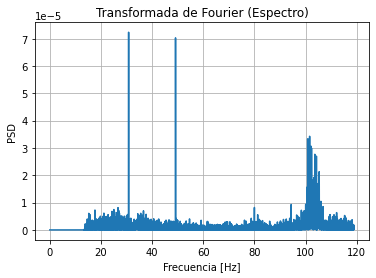

In [60]:
from scipy.fft import fft, fftfreq
N = df_vibraciones.shape[0]
DeltaT = df_vibraciones['t [s]'][1]-df_vibraciones['t [s]'][0]
AFreq = fft(np.array(df_vibraciones['a norm']))

# Vector de Frecuencias
Ffreq = fftfreq(N, DeltaT)[:(N+1)//2]
# Vector con la densidad de potencia espectral
PSD = 2.0 * DeltaT / N * np.abs(AFreq[:(N+1)//2])**2
PSD[0] = PSD[0]/2 # Corregir DC offset

# Plot
plt.plot(Ffreq,PSD)
plt.grid()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.title('Transformada de Fourier (Espectro)')

Una de las propiedades de la transformada de Fourier es que el área bajo la curva devuelve la potencia promedio de la señal, por lo que se verifica que:

$$\int_{0}^{\infty} PSD(f)\ df \approx \Delta f \sum_{i=0}^{M-1} PSD(f_{i}) = {a_{rms}}^{2} $$

Compruebe lo anterior calculando el rms a partir del vector `PSD`, obtentiendo $\Delta f$ del vector `Ffreq`.

In [61]:
rms_fft = []

# CODIGO DEL ALUMNO =================================
rms_fft = np.sqrt(np.sum(PSD)*Ffreq[1])
# ===================================================

print('El rms a partir de Fourier es: ', rms_fft)

El rms a partir de Fourier es:  0.011196957744751063


Ahora bien, los valores anteriores fueron evaluados para la señal en su conjunto. Sin embargo, en el gráfico se ve claramente que las aceleraciones aumentan sobre el final, cuando se capturó el paso de una formación de subte, respecto al inicio donde había únicamente vibración ambiente.

Para evaluar donde empieza y termina el evento de interés, un método de identificación muy habitual es calcular el rms de la señal en ventanas móviles de tiempo y ver cuándo este supera un umbral definido por el usuario. Este análisis se puede hacer con la opción `rolling` de pandas.

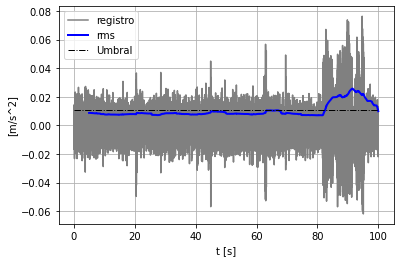

In [62]:
# Calcular el rms movil
vent = 5 # Longitud de ventana en segundos
umb = 0.011 # Valor umbral
idxvent = int(vent // DeltaT - 1)
df_vibraciones['Rolling_rms'] = (df_vibraciones['a norm']**2).rolling(idxvent).mean() **0.5

# Plotear
plt.plot(df_vibraciones['t [s]'],df_vibraciones['a norm'],color=[0.5,0.5,0.5],label='registro')
plt.plot(df_vibraciones['t [s]'],df_vibraciones['Rolling_rms'],'b-',linewidth=2,label='rms')
plt.plot([0, 100],[umb, umb],'k-.',linewidth=1,label='Umbral')
plt.xlabel('t [s]')
plt.ylabel('[m/s^2]')
plt.legend(loc=2)
plt.grid()
plt.show()

En el gráfico de arriba se ve que a partir de aproximadamente 82s el valor de rms supera el umbral, `umb`, de $0.011m/s^{2}$. Considerando que el calculo de media móvil introduce lag, esto quiere decir que el evento comenzó en realidad 5 segundos antes (la longitud de la ventana).

Por lo tanto, en el siguiente paso separe el dataset en 2: Uno para el paso del subte y otro para la vibración ambiente. Para ello debe encontrar el valor de tiempo `t` a partir del cual el valor de rms movil (`df_vibraciones['Rolling_rms']`) supera el umbral definido `umb`, y luego restar el lag de 5s (`vent`) para definir `Tlim`. Finalmente, genere los vectores `Subte` y `Ambiente` haciendo uso de las funciones de slicing y operaciones lógicas.

No es necesario encontrar el final del evento (asuma que termina al final del dataset)

El paso de subte comienza a los: 77.55462185


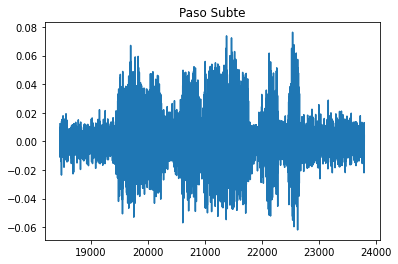

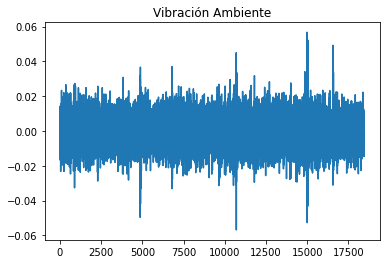

In [63]:
Subte = []
Ambiente = []
Tlim = []
# CODIGO DEL ALUMNO ====================================
TSubte = df_vibraciones['t [s]'][df_vibraciones['Rolling_rms'] > umb]
Tlim = np.min(TSubte) - vent
Subte = df_vibraciones['a norm'][df_vibraciones['t [s]']>Tlim]
Ambiente = df_vibraciones['a norm'][df_vibraciones['t [s]']<=Tlim]
# ======================================================

print('El paso de subte comienza a los:',Tlim)

plt.plot(Subte)
plt.title('Paso Subte')
plt.show()
plt.plot(Ambiente)
plt.title('Vibración Ambiente')
plt.show()

Finalmente, calcule la relación señal-ruido. Es decir, cuánto se distingue la señal a ser estudiada (el paso de subte) del ruido inherente de la zona (la vibración ambiente). En general se buscan valores superiores a 5, caso contrario el ruido va a influir en el análisis notoriamente (no podríamos decir que estamos viendo sólo el subte). Esta se define (en decibeles) como:

$$ SNR = 10 \log_{10}\left(\frac{RMS_{subte}}{RMS_{ambiente}}\right) $$

Puede utilizar cualquiera de las formas de rms que vimos anteriormente.

In [64]:
SNR = []

# CODIGO DEL ALUMNO ====================================
rms_subte = np.std(Subte-np.mean(Subte))
rms_ambiente = np.std(Ambiente-np.mean(Ambiente))
SNR = 10*np.log10(rms_subte/rms_ambiente)
# ======================================================

print('La relación señal ruido es de',SNR)

La relación señal ruido es de 3.3410920204776176


## Ejercicio 3: Explorando el dataset elegido

Como puntapié inicial del trabajo final de la materia, elija un dataset (como mínimo 3 variables!) que le sea de su interés particular, y sobre el cuál iremos trabajando a lo largo de la materia. No hay restricción en el tipo de dataset y su área de aplicación, pero sí asegúrese que sea público o, en caso contrario, esté debidamente anonimizado o acreditado.

Acá dejamos algunos links con sitios donde pueden llegar a encontrar datasets de interés:

*   [BA Data](https://data.buenosaires.gob.ar/dataset/): Datos públicos sobre la Ciudad de Buenos Aires
*   [Kaggle](https://www.kaggle.com/datasets): Datasets públicos de todo tipo
*   



Con el dataset elegido, le pediremos que conteste las siguientes preguntas:
1. Explique su interés en ese dataset, y cómo se relaciona con su vida profesional, académica o personal.
2. Cargue el dataset en python (se sugiere pandas!), describa cada variable contenida (significado y tipo de variable matemática),  y cómo fueron obtenidos los datos.
3. Realice un análisis exploratorio de los datos, haciendo previamente la limpieza que crea necesaria, que muestre:
  1. Valores medios, dispersión e histogramas de las variables
  2. Diagramas de correlación (scatter plots)
  3. Diagramas de autocorrelación